# ANN for classification of MNIST Dataset

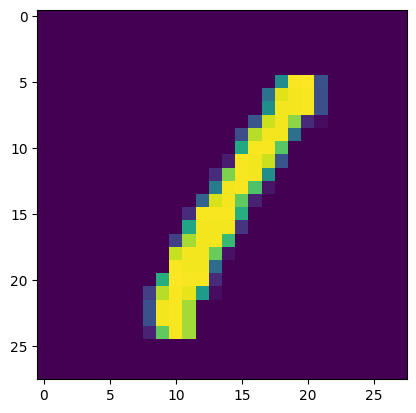

In [3]:
import warnings 
warnings.filterwarnings('ignore')
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10
(x_train,y_train), (x_test,y_test) = mnist.load_data()
plt.imshow(x_train[3])
plt.show()

- ### Converting all the values in the array in the range of 0 to 1 for better training by the neural network.

In [4]:
x_train = x_train/255
x_test = x_test/255

### Making the artificial neural network

In [6]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
## ANN with 2 hidden layers

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

- ### If we use sparse_categorical_crossentropy we need not one hot encode the output variable , whereas if we use categorical_crossentropy we need to one hot encode the output variable

In [10]:
history = model.fit(x_train,y_train, batch_size = batch_size, epochs = 10, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7917 - loss: 0.7107 - val_accuracy: 0.9442 - val_loss: 0.1980
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9502 - loss: 0.1730 - val_accuracy: 0.9588 - val_loss: 0.1503
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9642 - loss: 0.1223 - val_accuracy: 0.9643 - val_loss: 0.1238
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9723 - loss: 0.0939 - val_accuracy: 0.9681 - val_loss: 0.1107
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9797 - loss: 0.0696 - val_accuracy: 0.9710 - val_loss: 0.1044
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9823 - loss: 0.0596 - val_accuracy: 0.9720 - val_loss: 0.0984
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9870 - loss: 0.0440 - val_accuracy: 0.9722 - val_loss: 0.1001
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9892 - loss: 0.0373 - val_accuracy: 0.

In [11]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
from sklearn.metrics import accuracy_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy:97.54%


### Checking the results

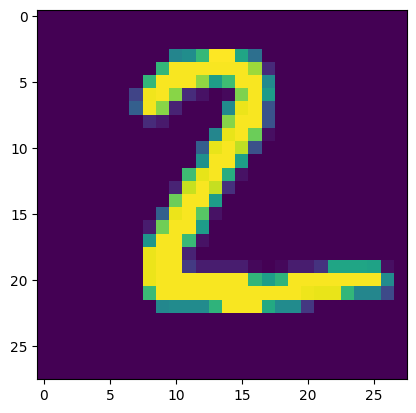

In [13]:
plt.imshow(x_test[1])
plt.show()

In [14]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([2])

## Using MNIST Fashion dataset

In [2]:
import warnings 
warnings.filterwarnings('ignore')
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt


(x_train_full,y_train_full), (x_test,y_test) = fashion_mnist.load_data()


In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_valid,x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]

In [5]:
## Fashion mnist dataset don't have class labels so we define the labels.
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

class_names[y_train[0]]

'Coat'

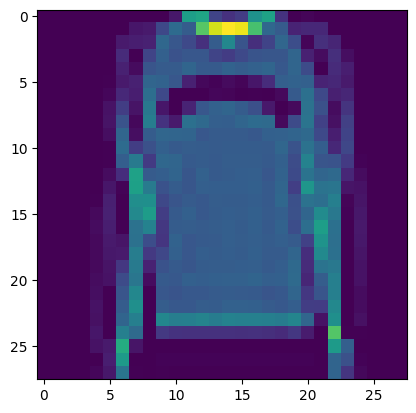

In [6]:
plt.imshow(x_train[100])

In [7]:
class_names[y_train[100]]

'Pullover'

### Building the model

In [8]:
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(300,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [10]:
history = model.fit(x_train,y_train, epochs = 30,verbose=1,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6632 - loss: 1.0322 - val_accuracy: 0.8236 - val_loss: 0.5210
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8273 - loss: 0.5033 - val_accuracy: 0.8498 - val_loss: 0.4434
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8405 - loss: 0.4568 - val_accuracy: 0.8568 - val_loss: 0.4225
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8499 - loss: 0.4247 - val_accuracy: 0.8660 - val_loss: 0.4107
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8561 - loss: 0.4069 - val_accuracy: 0.8590 - val_loss: 0.4091
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8630 - loss: 0.3869 - val_accuracy: 0.8728 - val_loss: 0.3737
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8690 - loss: 0.3704 - val_accuracy: 0.8730 - val_loss: 0.3754
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8742 - loss: 0.3527 - 

In [11]:
print("Accuracy is:",history.history['val_accuracy'][-1]*100,"%")

Accuracy is: 88.48000168800354 %


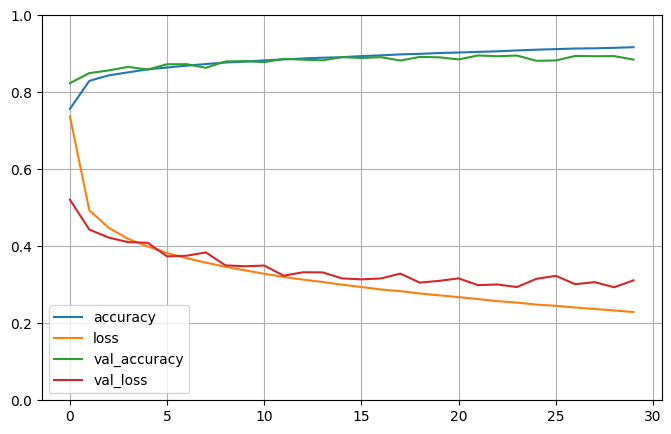

In [12]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [13]:
x_test = x_test / 255.0
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8775 - loss: 0.3482


[0.3435056507587433, 0.8776999711990356]

## Using model to make predictions

In [18]:
import numpy as np 
x_new = x_test[:3]  
y_proba = model.predict(x_new)     
y_pred = np.argmax(y_proba, axis=1)

for i, pred in enumerate(y_pred):
    print(f"Image {i+1} predicted as: {class_names[pred]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image 1 predicted as: Ankle boot
Image 2 predicted as: Pullover
Image 3 predicted as: Trouser


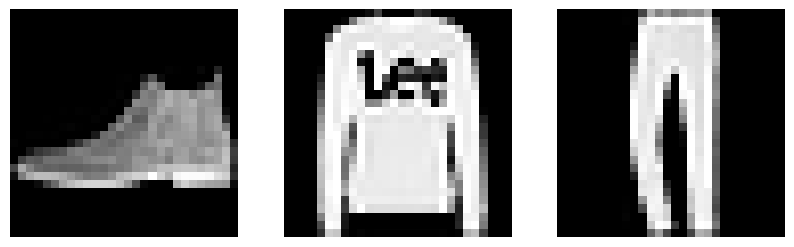

In [24]:
plt.figure(figsize=(10, 3))
for i, x in enumerate(x_new):
    plt.subplot(1, 3, i+1)
    plt.imshow(x, cmap='gray')
    plt.axis('off')
plt.show()
